In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
adjacent_counties = pd.read_excel('../data/raw/county_adjacency.xlsx', header=None)
adjacent_counties = adjacent_counties[[1, 3]]
adjacent_counties = adjacent_counties[adjacent_counties[1] != adjacent_counties[3]]
pairs = []
for index, row in adjacent_counties.iterrows():
    pair = set([row[1], row[3]])
    if pair not in pairs:
        pairs.append(pair)
np.random.seed(9)
np.random.shuffle(pairs)

In [21]:
print(len(pairs))

9483


In [22]:
# Read in dataset
dataset = pd.read_csv('../data/processed/ml_dataset.csv')

## Define helper function for testing features

In [23]:
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression as logreg

def test_features(features):
    train_x = training_set[features].to_numpy()
    train_y = training_set['More_Deaths'].to_numpy()
    test_x = test_set[features].to_numpy()
    test_y = test_set['More_Deaths'].to_numpy()

    train_x, train_y = shuffle(train_x, train_y, random_state=0)
    test_x, test_y = shuffle(test_x, test_y, random_state=0)
    train_y = np.ravel(train_y)
    test_y = np.ravel(test_y)
    
    print(f'Features: {features}')
    print(f'Test Ratio: {sum(test_y)/len(test_y)}')

    lr = logreg().fit(train_x, train_y)
    print(f'Score: {lr.score(test_x, test_y)}')
    print(f'Coefficients: {lr.coef_}\n')

In [24]:
dataset.columns

Index(['Unnamed: 0', 'FIPS', '2wk Prior Intra-Mobility',
       '2wk Onset Intra-Mobility', '2wk Prior Inter-Mobility',
       '2wk Onset Inter-Mobility',
       'Density per square mile of land area - Population',
       'Rural-urban_Continuum Code_2013',
       'Percent of adults with less than a high school diploma 2014-18',
       'Percent of adults with a bachelor's degree or higher 2014-18',
       'Unemployment_rate_2018', 'Med_HH_Income_Percent_of_State_Total_2018',
       'Jan Temp AVG / F', 'Feb Temp AVG / F', 'Mar Temp AVG / F',
       'Apr Temp AVG / F', 'May Temp AVG / F', 'Jun Temp AVG / F',
       'Jul Temp AVG / F', 'Aug Temp AVG / F', 'Sep Temp AVG / F',
       'Oct Temp AVG / F', 'Nov Temp AVG / F', 'Dec Temp AVG / F',
       'Total_age65plus', 'Total households!!Average household size',
       'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school preschool',
       'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Kinder

In [25]:
dataset.head()

,Unnamed: 0,FIPS,2wk Prior Intra-Mobility,2wk Onset Intra-Mobility,2wk Prior Inter-Mobility,2wk Onset Inter-Mobility,Density per square mile of land area - Population,Rural-urban_Continuum Code_2013,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,...,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!College or graduate school,POP_ESTIMATE_2018,Area in square miles - Land area,HospCt,Beds,NursingCt,Hispanic Population,Black Population,Deaths,Outbreak_date
0,0,1001,7461.571429,7314.285714,13927.142857,13194.857143,91.8,2.0,11.3,27.7,...,NaN,55601,594.44,1.0,85,6.0,1649.0,10915.0,4,2020-04-27
1,1,1003,35004.000000,32185.714286,47460.285714,42444.714286,114.6,3.0,9.7,31.3,...,6503.0,218022,1589.78,1.0,332,9.0,10131.0,19492.0,6,2020-04-20
2,2,1011,682.142857,690.714286,1401.285714,1447.571429,17.5,6.0,24.8,13.3,...,NaN,10138,622.80,1.0,61,1.0,807.0,7168.0,8,2020-05-25
3,3,1013,2333.142857,2367.285714,4201.714286,4058.285714,27.0,6.0,15.4,16.1,...,NaN,19680,776.83,1.0,94,5.0,297.0,8839.0,16,2020-05-08
4,4,1015,16956.857143,16182.142857,25290.571429,23753.571429,195.7,3.0,15.9,18.0,...,6890.0,114277,605.87,1.0,552,9.0,4469.0,24153.0,3,2020-04-20


In [26]:
dataset['area'] = dataset['Area in square miles - Land area']
dataset['no_dip'] = dataset['Percent of adults with less than a high school diploma 2014-18']
dataset['elderly_ratio'] = dataset['Total_age65plus']/dataset['POP_ESTIMATE_2018']
dataset['hispanic_ratio'] = dataset['Hispanic Population']/dataset['POP_ESTIMATE_2018']
dataset['black_ratio'] = dataset['Black Population']/dataset['POP_ESTIMATE_2018']
dataset['RUCC'] = dataset['Rural-urban_Continuum Code_2013']

In [27]:
dataset = dataset[["FIPS", "Beds", "2wk Prior Intra-Mobility", "2wk Onset Intra-Mobility", "2wk Prior Inter-Mobility", "2wk Onset Inter-Mobility", "area", "elderly_ratio", "hispanic_ratio", "black_ratio", "RUCC", "Deaths", "HospCt", "NursingCt", "POP_ESTIMATE_2018"]]

## Normalize Variables By Population

In [28]:
dataset['Deaths'] = dataset['Deaths']/dataset['POP_ESTIMATE_2018']
dataset['NursingCt'] = dataset['NursingCt']/dataset['POP_ESTIMATE_2018']
dataset['HospCt'] = dataset['HospCt']/dataset['POP_ESTIMATE_2018']
dataset['Beds'] = dataset['Beds']/dataset['POP_ESTIMATE_2018']
dataset.head()

,FIPS,Beds,2wk Prior Intra-Mobility,2wk Onset Intra-Mobility,2wk Prior Inter-Mobility,2wk Onset Inter-Mobility,area,elderly_ratio,hispanic_ratio,black_ratio,RUCC,Deaths,HospCt,NursingCt,POP_ESTIMATE_2018
0,1001,0.001529,7461.571429,7314.285714,13927.142857,13194.857143,594.44,0.155627,0.029658,0.196309,2.0,0.000072,0.000018,0.000108,55601
1,1003,0.001523,35004.000000,32185.714286,47460.285714,42444.714286,1589.78,0.204433,0.046468,0.089404,3.0,0.000028,0.000005,0.000041,218022
2,1011,0.006017,682.142857,690.714286,1401.285714,1447.571429,622.80,0.163839,0.079601,0.707043,6.0,0.000789,0.000099,0.000099,10138
3,1013,0.004776,2333.142857,2367.285714,4201.714286,4058.285714,776.83,0.202998,0.015091,0.449136,6.0,0.000813,0.000051,0.000254,19680
4,1015,0.004830,16956.857143,16182.142857,25290.571429,23753.571429,605.87,0.177175,0.039107,0.211355,3.0,0.000026,0.000009,0.000079,114277


Create the dataset that is to be fed into the classifier: For each pair of counties, take the difference in their features, and also provide an indicator variable identifying which county has more deaths

In [29]:
model_data = pd.DataFrame(columns=['Hosp_diff','Beds_diff','Nurse_diff', 'area_diff', 'hispanic_diff', 'black_diff', '2wk_prior_intra_diff', '2wk_prior_inter_diff', '2wk_onset_intra_diff', '2wk_onset_inter_diff','RUCC_diff', 'elderly_diff', 'death_diff', 'More_Deaths'])
model_data = model_data.apply(pd.to_numeric) 
dataset.reset_index(drop=True, inplace=True)

for fips1, fips2 in pairs:
    
    row1_df = dataset.loc[dataset["FIPS"] == fips1].reset_index(drop=True)
    row2_df = dataset.loc[dataset["FIPS"] == fips2].reset_index(drop=True)

    if row1_df.empty or row2_df.empty:
        continue
        
    for _, row1 in row1_df.iterrows():
        for _, row2 in row2_df.iterrows():
            if row1['Deaths'] != row2["Deaths"]:

                if row1['Deaths']  > row2["Deaths"]:
                    model_data = model_data.append({'Hosp_diff': float(row1['HospCt']) - float(row2['HospCt']),\
                                                    'Beds_diff': float(row1['Beds']) - float(row2['Beds']),\
                                                        'Nurse_diff': float(row1['NursingCt']) - float(row2['NursingCt']),\
                                                        'RUCC_diff': int(row1['RUCC']) - int(row2['RUCC']),\
                                                        'area_diff':float(row1['area']) - float(row2['area']),\
                                                        'elderly_diff': float(row1['elderly_ratio']) - float(row2['elderly_ratio']),\
                                                        'hispanic_diff':float(row1['hispanic_ratio']) - float(row2['hispanic_ratio']),\
                                                        'black_diff': float(row1['black_ratio']) - float(row2['black_ratio']),\
                                                        '2wk_prior_intra_diff': float(row1['2wk Prior Intra-Mobility']) - float(row2['2wk Prior Intra-Mobility']),\
                                                        '2wk_prior_inter_diff': float(row1['2wk Prior Inter-Mobility']) - float(row2['2wk Prior Inter-Mobility']),\
                                                        '2wk_onset_intra_diff': float(row1['2wk Onset Intra-Mobility']) - float(row2['2wk Onset Intra-Mobility']),\
                                                        '2wk_onset_inter_diff': float(row1['2wk Onset Inter-Mobility']) - float(row2['2wk Onset Inter-Mobility']),\
                                                        'death_diff' : float(row1['Deaths']) - float(row2['Deaths']),\
                                                        'More_Deaths':0}, ignore_index=True)   
                elif row1['Deaths']  < row2["Deaths"]:  
                    model_data = model_data.append({'Hosp_diff': float(row1['HospCt']) - float(row2['HospCt']),\
                                                    'Beds_diff': float(row1['Beds']) - float(row2['Beds']),\
                                                    'Nurse_diff': float(row1['NursingCt']) - float(row2['NursingCt']),\
                                                        'RUCC_diff': int(row1['RUCC']) - int(row2['RUCC']),\
                                                        'area_diff':float(row1['area']) - float(row2['area']),\
                                                        'elderly_diff': float(row1['elderly_ratio']) - float(row2['elderly_ratio']),\
                                                        'hispanic_diff':float(row1['hispanic_ratio']) - float(row2['hispanic_ratio']),\
                                                        'black_diff': float(row1['black_ratio']) - float(row2['black_ratio']),\
                                                        '2wk_prior_intra_diff': float(row1['2wk Prior Intra-Mobility']) - float(row2['2wk Prior Intra-Mobility']),\
                                                        '2wk_prior_inter_diff': float(row1['2wk Prior Inter-Mobility']) - float(row2['2wk Prior Inter-Mobility']),\
                                                        '2wk_onset_intra_diff': float(row1['2wk Onset Intra-Mobility']) - float(row2['2wk Onset Intra-Mobility']),\
                                                        '2wk_onset_inter_diff': float(row1['2wk Onset Inter-Mobility']) - float(row2['2wk Onset Inter-Mobility']),\
                                                        'death_diff' : float(row1['Deaths']) - float(row2['Deaths']),\
                                                        'More_Deaths':1}, ignore_index=True)  

In [30]:
print(len(model_data))

1688


In [31]:
model_data.head()

,Hosp_diff,Beds_diff,Nurse_diff,area_diff,hispanic_diff,black_diff,2wk_prior_intra_diff,2wk_prior_inter_diff,2wk_onset_intra_diff,2wk_onset_inter_diff,RUCC_diff,elderly_diff,death_diff,More_Deaths
0,-1.261461e-05,-0.000683,-4.501609e-06,-110.27,0.022944,0.046327,8661.285714,13766.285714,8647.285714,13305.428571,0.0,-0.052809,-0.000063,1.0
1,2.838007e-06,0.001119,2.554207e-05,-621.74,0.008383,0.003477,-2808.428571,-3308.142857,-4401.285714,-4953.714286,-1.0,-0.054622,0.000058,0.0
2,7.625287e-08,-0.006309,6.862758e-07,333.96,0.025959,-0.449597,11833.714286,7239.000000,11357.571429,7673.142857,0.0,0.006718,-0.000012,1.0
3,-2.368882e-05,-0.001635,-2.616402e-05,998.40,-0.113535,-0.000140,-1948.571429,-2468.857143,-2058.285714,-2603.285714,3.0,-0.103350,0.000029,0.0
4,-2.279745e-06,0.007267,-2.051770e-05,94.26,-0.012046,0.514662,-4232.428571,-5649.571429,-2013.714286,-2144.714286,0.0,-0.012319,0.000007,0.0


In [88]:
model_data = model_data.apply(pd.to_numeric) 

model_data['Hosp_diff'] = (model_data['Hosp_diff'] - np.min(model_data['Hosp_diff']))/(np.max(model_data['Hosp_diff']) - np.min(model_data['Hosp_diff']))

model_data['Beds_diff'] = (model_data['Beds_diff'] - np.min(model_data['Beds_diff']))/(np.max(model_data['Beds_diff']) - np.min(model_data['Beds_diff']))

model_data['Nurse_diff'] = (model_data['Nurse_diff'] - np.min(model_data['Nurse_diff']))/(np.max(model_data['Nurse_diff']) - np.min(model_data['Nurse_diff']))

model_data['area_diff'] = (model_data['area_diff'] - np.min(model_data['area_diff']))/(np.max(model_data['area_diff']) - np.min(model_data['area_diff']))

model_data['RUCC_diff'] = (model_data['RUCC_diff'] - np.min(model_data['RUCC_diff']))/(np.max(model_data['RUCC_diff']) - np.min(model_data['RUCC_diff']))

model_data['hispanic_diff'] = (model_data['hispanic_diff'] - np.min(model_data['hispanic_diff']))/(np.max(model_data['hispanic_diff']) - np.min(model_data['hispanic_diff']))

model_data['elderly_diff'] = (model_data['elderly_diff'] - np.min(model_data['elderly_diff']))/(np.max(model_data['elderly_diff']) - np.min(model_data['elderly_diff']))

model_data['black_diff'] = (model_data['black_diff'] - np.min(model_data['black_diff']))/(np.max(model_data['black_diff']) - np.min(model_data['black_diff']))

model_data['2wk_prior_intra_diff'] = (model_data['2wk_prior_intra_diff'] - np.min(model_data['2wk_prior_intra_diff']))/(np.max(model_data['2wk_prior_intra_diff']) - np.min(model_data['2wk_prior_intra_diff']))

model_data['2wk_prior_inter_diff'] = (model_data['2wk_prior_inter_diff'] - np.min(model_data['2wk_prior_inter_diff']))/(np.max(model_data['2wk_prior_inter_diff']) - np.min(model_data['2wk_prior_inter_diff']))

model_data['2wk_onset_intra_diff'] = (model_data['2wk_onset_intra_diff'] - np.min(model_data['2wk_onset_intra_diff']))/(np.max(model_data['2wk_onset_intra_diff']) - np.min(model_data['2wk_onset_intra_diff']))

model_data['2wk_onset_inter_diff'] = (model_data['2wk_onset_inter_diff'] - np.min(model_data['2wk_onset_inter_diff']))/(np.max(model_data['2wk_onset_inter_diff']) - np.min(model_data['2wk_onset_inter_diff']))

model_data['death_diff'] = (model_data['death_diff'] - np.min(model_data['death_diff']))/(np.max(model_data['death_diff']) - np.min(model_data['death_diff']))

Normalize with std

In [32]:
model_data = model_data.apply(pd.to_numeric) 

model_data['Hosp_diff'] = (model_data['Hosp_diff'] - np.mean(model_data['Hosp_diff']))/np.std(model_data['Hosp_diff']) 

model_data['Beds_diff'] = (model_data['Beds_diff'] - np.mean(model_data['Beds_diff']))/np.std(model_data['Beds_diff']) 

model_data['Nurse_diff'] = (model_data['Nurse_diff'] - np.mean(model_data['Nurse_diff']))/np.std(model_data['Nurse_diff']) 

model_data['area_diff'] = (model_data['area_diff'] - np.mean(model_data['area_diff']))/np.std(model_data['area_diff'])

model_data['RUCC_diff'] = (model_data['RUCC_diff'] - np.mean(model_data['RUCC_diff']))/np.std(model_data['RUCC_diff']) 

model_data['hispanic_diff'] = (model_data['hispanic_diff'] - np.mean(model_data['hispanic_diff']))/np.std(model_data['hispanic_diff'])

model_data['elderly_diff'] = (model_data['elderly_diff'] - np.mean(model_data['elderly_diff']))/np.std(model_data['elderly_diff']) 

model_data['black_diff'] = (model_data['black_diff'] - np.mean(model_data['black_diff']))/np.std(model_data['black_diff'])

model_data['2wk_prior_intra_diff'] = (model_data['2wk_prior_intra_diff'] - np.mean(model_data['2wk_prior_intra_diff']))/np.std(model_data['2wk_prior_intra_diff']) 

model_data['2wk_prior_inter_diff'] = (model_data['2wk_prior_inter_diff'] - np.mean(model_data['2wk_prior_inter_diff']))/np.std(model_data['2wk_prior_inter_diff'])

model_data['2wk_onset_intra_diff'] = (model_data['2wk_onset_intra_diff'] - np.mean(model_data['2wk_onset_intra_diff']))/np.std(model_data['2wk_onset_intra_diff'])

model_data['2wk_onset_inter_diff'] = (model_data['2wk_onset_inter_diff'] - np.mean(model_data['2wk_onset_inter_diff']))/np.std(model_data['2wk_onset_inter_diff'])

model_data['death_diff'] = (model_data['death_diff'] - np.mean(model_data['death_diff']))/np.std(model_data['death_diff'])

In [33]:
print(len(model_data))
model_data.head()

1688


,Hosp_diff,Beds_diff,Nurse_diff,area_diff,hispanic_diff,black_diff,2wk_prior_intra_diff,2wk_prior_inter_diff,2wk_onset_intra_diff,2wk_onset_inter_diff,RUCC_diff,elderly_diff,death_diff,More_Deaths
0,-0.671830,-0.280894,-0.064476,-0.090644,0.270286,0.329482,0.194277,0.241972,0.182502,0.214730,-0.027120,-1.056456,-0.170181,1.0
1,0.104721,0.427809,0.328067,-0.513287,0.098663,0.020024,-0.037721,-0.036763,-0.059701,-0.050609,-0.530180,-1.095586,0.248037,0.0
2,-0.034067,-2.493772,0.003308,0.276436,0.305817,-3.252058,0.258445,0.135416,0.232810,0.132883,-0.027120,0.228760,0.005987,1.0
3,-1.228350,-0.655176,-0.347511,0.825482,-1.338305,-0.006101,-0.020329,-0.023062,-0.016211,-0.016453,1.482062,-2.147655,0.148264,0.0
4,-0.152465,2.845947,-0.273737,0.078365,-0.142119,3.711783,-0.066524,-0.074987,-0.015384,-0.009789,-0.027120,-0.182254,0.072686,0.0


In [34]:
model_data = model_data.sample(frac=1, random_state=2)
training_set = model_data.head(1300)
test_set = model_data.tail(388)

array([[1.        , 0.15854034],
       [0.15854034, 1.        ]])

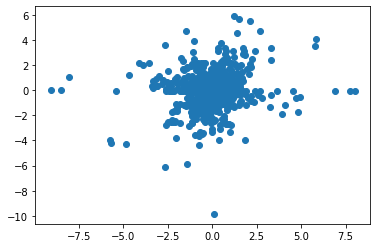

In [17]:
import matplotlib.pyplot as plt

plot_data = pd.concat([training_set, test_set])
plt.scatter(plot_data['death_diff'], plot_data['Hosp_diff'])
np.corrcoef(plot_data['death_diff'], plot_data['Hosp_diff'])

In [16]:
plt.scatter(plot_data['death_diff'], plot_data['Nurse_diff'])
np.corrcoef(plot_data['death_diff'], plot_data['Nurse_diff'])

NameError: name 'plot_data' is not defined

array([[ 1.        , -0.13634808],
       [-0.13634808,  1.        ]])

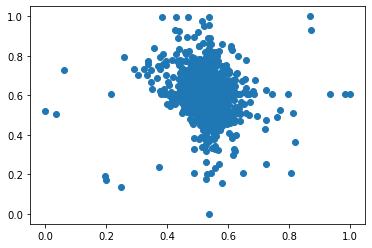

In [45]:
plt.scatter(plot_data['death_diff'], plot_data['Beds_diff'])
np.corrcoef(plot_data['death_diff'], plot_data['Beds_diff'])

Write out dataset for R processing

In [35]:
model_data.to_csv('../data/processed/ml_r_analysis_dataset_seed_0_std.tsv', sep='\t')

In [73]:
print(len(training_set))
print(len(test_set))
print(sum(training_set['More_Deaths'])/len(training_set))
print(sum(test_set['More_Deaths'])/len(test_set))

1300
388
0.5107692307692308
0.49742268041237114


In [90]:
test_features(['Hosp_diff'])
test_features(['Beds_diff'])
test_features(['Nurse_diff'])
test_features(['area_diff'])
test_features(['RUCC_diff'])
test_features(['Nurse_diff', 'Beds_diff'])
test_features(['RUCC_diff', 'area_diff', 'Nurse_diff', 'Beds_diff'])
test_features(['RUCC_diff', 'area_diff', 'Nurse_diff', 'Beds_diff', "2wk_onset_intra_diff"])
test_features(['RUCC_diff', 'area_diff', 'Nurse_diff', 'Beds_diff', "2wk_prior_intra_diff"])
test_features(['RUCC_diff', 'area_diff', 'Nurse_diff', 'Beds_diff', "2wk_prior_intra_diff", "elderly_diff", "black_diff", "hispanic_diff"])
test_features(['RUCC_diff', 'Beds_diff', 'area_diff', 'Nurse_diff', 'Hosp_diff', "2wk_prior_intra_diff", "elderly_diff", "black_diff", "hispanic_diff"])

Features: ['Hosp_diff']
Test Ratio: 0.49742268041237114
Score: 0.5592783505154639
Coefficients: [[-3.08622459]]

Features: ['Beds_diff']
Test Ratio: 0.49742268041237114
Score: 0.5567010309278351
Coefficients: [[2.10471608]]

Features: ['Nurse_diff']
Test Ratio: 0.49742268041237114
Score: 0.6314432989690721
Coefficients: [[-5.09691041]]

Features: ['area_diff']
Test Ratio: 0.49742268041237114
Score: 0.5025773195876289
Coefficients: [[0.37338392]]

Features: ['RUCC_diff']
Test Ratio: 0.49742268041237114
Score: 0.5515463917525774
Coefficients: [[-3.22378757]]

Features: ['Nurse_diff', 'Beds_diff']
Test Ratio: 0.49742268041237114
Score: 0.634020618556701
Coefficients: [[-4.88767332  1.81898908]]

Features: ['RUCC_diff', 'area_diff', 'Nurse_diff', 'Beds_diff']
Test Ratio: 0.49742268041237114
Score: 0.6365979381443299
Coefficients: [[-2.50711026  0.2901486  -3.72227963  1.73851077]]

Features: ['RUCC_diff', 'area_diff', 'Nurse_diff', 'Beds_diff', '2wk_onset_intra_diff']
Test Ratio: 0.4974226

[[ 1.         -0.11363114]
 [-0.11363114  1.        ]]
[[1.         0.19546456]
 [0.19546456 1.        ]]
[[1.         0.22112472]
 [0.22112472 1.        ]]


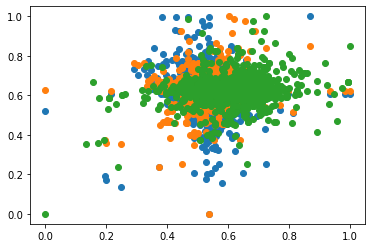

In [51]:
import matplotlib.pyplot as plt

plot_data = training_set.copy()
plt.scatter(plot_data['death_diff'], plot_data['Beds_diff'])
print(np.corrcoef(plot_data['death_diff'], plot_data['Beds_diff']))

plot_data = training_set.copy()
plt.scatter(plot_data['death_diff'], plot_data['Hosp_diff'])
print(np.corrcoef(plot_data['death_diff'], plot_data['Hosp_diff']))

plot_data = training_set.copy()
plt.scatter(plot_data['Beds_diff'], plot_data['Hosp_diff'])
print(np.corrcoef(plot_data['Hosp_diff'], plot_data['elderly_diff']))